In [32]:
import pandas as pd
import numpy as np
from numpy import *
import os
import pandas as pd
import tqdm
import sys
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.datasets import make_classification
%matplotlib inline

In [6]:
save_dir = os.path.join(os.getcwd(), 'NEPDF_data_2')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

def get_gene_list_bulk(file_name):
    """
    建立基因symbol到ensembl转换的字典
    file_name = './data/bulk_gene_list.txt'
    """
    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of bulk RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h


def get_gene_list(file_name):
    """
    建立基因symbol到一个id转换的字典
    file_name = './data/sc_gene_list.txt'
    """

    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of sc RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h

def get_sepration_index(file_name):
    import numpy as np
    index_list = []
    s = open(file_name, 'r')
    for line in s:
        index_list.append(int(line))
    return (np.array(index_list))

In [7]:
mode = '1'  # 0是单分类，1是多分类

###########################
# 建立基因symbol到ensembl转换的字典

# h_gene_list_bulk = get_gene_list_bulk(sys.argv[1])  # 'bulk_gene_list.txt')#
h_gene_list_bulk = get_gene_list_bulk('./data/bulk_gene_list.txt')  # 'bulk_gene_list.txt')#
print('read bulk gene list')

    
# h_gene_list = get_gene_list(sys.argv[2])  # 'sc_gene_list.txt')#
h_gene_list = get_gene_list('./data/sc_gene_list.txt')  # 'sc_gene_list.txt')#
print('read sc gene list')

store = pd.HDFStore('./data/mouse_bulk.h5')
rpkm_bulk = store['rpkm']
store.close()
print('read bulk RNA-seq expression')
rpkm_bulk

read bulk gene list
read sc gene list
read bulk RNA-seq expression


,ENSMUSG00000000001,ENSMUSG00000000003,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,...,ENSMUSG00000104518,ENSMUSG00000104519,ENSMUSG00000104520,ENSMUSG00000104521,ENSMUSG00000104522,ENSMUSG00000104523,ENSMUSG00000104524,ENSMUSG00000104525,ENSMUSG00000104526,ENSMUSG00000104527
1,98.09,0.0,17.44,508.80,2.65,1.10,29.60,17.46,29.87,19.86,...,0.0,0.03,0.00,0.0,0.0,4.69,0.43,0.01,0.0,0.0
2,70.62,0.0,0.93,1.04,0.97,0.40,6.11,166.12,39.71,13.42,...,0.0,0.10,0.00,0.0,0.0,0.00,0.02,0.00,0.0,0.0
3,9.72,0.0,1.31,0.89,0.10,0.12,26.96,3.86,5.48,25.22,...,0.0,0.08,0.10,0.0,0.0,0.46,0.58,1.92,0.0,0.0
4,5.26,0.0,0.00,333.47,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
5,10.16,0.0,4.11,0.97,0.21,0.00,16.49,31.01,5.53,13.69,...,0.0,0.07,0.00,0.0,0.0,0.00,0.00,0.06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,94.40,0.0,13.48,88.15,1.66,0.09,41.46,4.13,22.28,38.70,...,0.0,0.06,0.00,0.0,0.0,9.08,0.91,0.03,0.0,0.0
246,29.23,0.0,0.00,1127.23,0.00,42.59,7.21,0.00,0.00,146.76,...,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0
247,45.10,0.0,13.86,0.05,0.00,0.06,62.70,0.00,5.94,24.11,...,0.0,0.00,0.05,0.0,0.0,1.00,0.24,1.23,0.0,0.0
248,93.01,0.0,31.50,244.73,2.74,2.08,25.99,49.54,20.83,19.69,...,0.0,0.20,0.15,0.0,0.0,3.50,0.30,0.02,0.0,0.0


In [8]:
store = pd.HDFStore('./data/bone_marrow_cell.h5')  # '/home/yey3/sc_process_1/rank_total_gene_rpkm.h5')    # scRNA-seq expression data                        )#
rpkm = store['RPKMs']
store.close()
print('read sc RNA-seq expression')
rpkm

read sc RNA-seq expression


,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,...,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
GSE41265_GSM1012788_SRR578581,0.085863,0.053987,0.0,0.000000,0.000000,0.788288,0.077623,5.670716,315.864386,0.000000,...,0.000000,0.219942,0.921119,0.000000,0.000000,1.408526,0.000000,0.054158,0.138846,0.052534
GSE41265_GSM1110889_SRR799683,7.412014,0.063840,0.0,0.000000,0.000000,0.179636,0.642533,1846.187044,103.104245,23.771005,...,0.000000,64.956231,0.000000,3.090357,0.097965,0.000000,0.000000,0.000000,3.324802,0.000000
GSE41265_GSM1110890_SRR799684,0.000000,12.037643,0.0,0.039253,0.000000,0.102503,14.601501,3540.700090,22.899794,0.432650,...,0.000000,89.988372,23.948507,0.000000,0.000000,0.115486,0.000000,0.046625,8.785713,5.404631
GSE41265_GSM1110890_SRR799685,0.000000,12.488104,0.0,0.000000,0.000000,0.157862,12.949241,3602.986494,25.244305,0.623322,...,0.061340,94.660704,21.478569,0.000000,0.000000,0.000000,0.000000,0.067173,11.667424,5.505932
GSE41265_GSM1110891_SRR799686,0.000000,0.046583,0.0,0.000000,0.000000,2.695954,23.475915,2014.659753,47.655663,0.000000,...,0.000000,86.540135,0.317922,0.000000,9.650364,32.236277,0.000000,0.140193,59.783135,7.456800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE81682_GSM2170276_SRR3560095,6.445299,0.000000,0.0,0.000000,0.429903,2.584064,0.000000,3.446730,18.034300,0.000000,...,0.000000,0.952495,106.374822,0.000000,3.348550,0.000000,0.000000,0.000000,0.000000,2.730096
GSE81682_GSM2170277_SRR3560096,24.122951,0.000000,0.0,0.000000,0.000000,0.946719,0.000000,13.447795,18.487480,0.000000,...,0.000000,18.216986,0.000000,0.000000,0.000000,26.843578,0.000000,0.574167,1.196011,0.278478
GSE81682_GSM2170282_SRR3560101,44.858982,0.000000,0.0,0.000000,11.885296,1.638539,0.000000,2.165681,9.442897,3.646625,...,0.358857,20.348342,37.429507,0.000000,12.623952,0.000000,0.000000,0.785960,0.251875,7.814596
GSE81682_GSM2170284_SRR3560103,10.777650,0.000000,0.0,0.000000,0.000000,2.245448,0.000000,0.000000,0.466707,0.000000,...,0.000000,80.357348,0.000000,0.000000,0.000000,0.000000,3.775973,0.000000,0.000000,2.355059


In [9]:
gene_pair_label = []
# s = open(sys.argv[3])  # 'mmukegg_new_new_unique_rand_labelx.txt')#)   ### read the gene pair and label file
s = open('./data/bone_marrow_gene_pairs_200.txt')
for line in s:
    gene_pair_label.append(line)
# gene_pair_index = get_sepration_index(
#     sys.argv[4])  # 'mmukegg_new_new_unique_rand_labelx_num.npy')#sys.argv[6]) # read file speration index
gene_pair_index = get_sepration_index('./data/bone_marrow_gene_pairs_200_num.txt')
s.close()
gene_pair_label_array = array(gene_pair_label)
print(len(gene_pair_index)-1)
print(len(gene_pair_label_array)*2/3)

13
53502.0


In [34]:
for i in range(len(gene_pair_index) - 1):
    start_index = gene_pair_index[i]
    end_index = gene_pair_index[i+1]
    x = []
    y = []
    z = []
    for gene_pair in tqdm.tqdm(gene_pair_label_array[start_index:end_index]):
        separation = gene_pair.split()
        x_gene_name,y_gene_name,label = separation[0],separation[1],separation[2]
        if label == '1' or label == '0':
            y.append(label)
            z.append(x_gene_name+'\t'+y_gene_name)
            x_tf = log10(rpkm[int(h_gene_list[x_gene_name])][0:6284] + 10 ** -2) # ## 43261 means the number of samples in the sc data, we also have one row that is sum of all cells, so the real size is 43262, that is why we use [0:43261]. For TF target prediction or other data, just remove "[0:43261]"
            x_gene = log10(rpkm[int(h_gene_list[y_gene_name])][0:6284] + 10 ** -2)# For TF target prediction, remove "[0:43261]"
            H_T = histogram2d(x_tf, x_gene, bins=32)
            H = H_T[0].T
            HT = (log10(H / 6284 + 10 ** -4) + 4) / 4
            x.append(HT)
    
    if (len(x)>0):
        xx = array(x)[:, :, :, newaxis]
    else:
        xx = array(x)
    save(save_dir+'/Nxdata_tf' + str(i) + '.npy', xx)
    save(save_dir+'/ydata_tf' + str(i) + '.npy', array(y))
    save(save_dir+'/zdata_tf' + str(i) + '.npy', array(z))

100%|██████████| 12036/12036 [00:10<00:00, 1151.47it/s]


In [28]:
from __future__ import print_function
import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os,sys
import tqdm
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import interp
import plotly.express as px
%matplotlib inline

In [2]:
data_path = './NEPDF_data_2'
# num_predictions = 20
batch_size = 1024  # mini batch for training
num_classes = 2   #### categories of labels
epochs = 300     #### iterations of trainning, with GPU 1080, 600 for KEGG and Reactome, 200 for tasks for GTRD
length_TF = 13  # number of divide data parts
# num_predictions = 20
model_name = 'keras_cnn_trained_model_shallow.h5'

In [3]:
def load_data_TF2(indel_list,data_path): # cell type specific  ## random samples for reactome is not enough, need borrow some from keggp
    import random
    import numpy as np
    xxdata_list = []
    yydata = []
    count_set = [0]
    count_setx = 0
    for i in indel_list:#len(h_tf_sc)):
        xdata = np.load(data_path+'/Nxdata_tf' + str(i) + '.npy')
        ydata = np.load(data_path+'/ydata_tf' + str(i) + '.npy')
        for k in range(len(ydata)):
            xxdata_list.append(xdata[k,:,:,:])
            yydata.append(ydata[k])
        count_setx = count_setx + len(ydata)
        count_set.append(count_setx)
    yydata_array = np.array(yydata)
    yydata_x = yydata_array.astype('int')
    print(np.array(xxdata_list).shape)
    return((np.array(xxdata_list),yydata_x,count_set))

In [5]:
save_dir = os.path.join(os.getcwd(),'YYYY_saved_models_T_32-32-64-64-128-128-512_e'+str(epochs)) ## the result folder 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [6]:
test_indel = 0
whole_data_TF = [i for i in range(length_TF)]
whole_data_TF.pop(test_indel)
test_TF = [test_indel]
train_TF = whole_data_TF
(x_train, y_train, count_set_train) = load_data_TF2(train_TF,data_path)
(x_test, y_test, count_set) = load_data_TF2(test_TF,data_path)
if num_classes > 2:
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, 'y_train samples')
print(y_test.shape, 'y_test samples')

(53380, 32, 32, 1)
(122, 32, 32, 1)
(53380,) y_train samples
(122,) y_test samples


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
if num_classes <2:
    print ('no enough categories')
    sys.exit()
elif num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
else:
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=False, mode='auto')
checkpoint1 = ModelCheckpoint(filepath=save_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                              verbose=False, save_best_only=False, save_weights_only=False, mode='auto', period=1)
checkpoint2 = ModelCheckpoint(filepath=save_dir + '/weights.hdf5', monitor='val_accuracy', verbose=False,
                              save_best_only=True, mode='auto', period=1)
callbacks_list = [checkpoint2, early_stopping]
print('Not using data augmentation.')

Not using data augmentation.


In [10]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_split=0.2,
          shuffle=True, callbacks=callbacks_list)

Epoch 1/300
42/42 [==============================] - 2s 51ms/step - loss: 0.6884 - accuracy: 0.5988 - val_loss: 0.6847 - val_accuracy: 0.6644
Epoch 2/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6599 - accuracy: 0.6554 - val_loss: 0.6739 - val_accuracy: 0.5478
Epoch 3/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6270 - accuracy: 0.6724 - val_loss: 0.6663 - val_accuracy: 0.5682
Epoch 4/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6153 - accuracy: 0.6723 - val_loss: 0.6432 - val_accuracy: 0.6262
Epoch 5/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6110 - accuracy: 0.6739 - val_loss: 0.6515 - val_accuracy: 0.6180
Epoch 6/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6076 - accuracy: 0.6781 - val_loss: 0.6455 - val_accuracy: 0.6300
Epoch 7/300
42/42 [==============================] - 1s 30ms/step - loss: 0.6054 - accuracy: 0.6821 - val_loss: 0.6191 - val_accuracy: 0.6614
Epoch 

In [12]:
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
y_predict = model.predict(x_test)
np.save(save_dir+'/end_y_test.npy',y_test)
np.save(save_dir+'/end_y_predict.npy',y_predict)

Saved trained model at /GPUFS/sysu_jjzhang_1/xiongjh/YYYY_saved_models_T_32-32-64-64-128-128-512_e300/keras_cnn_trained_model_shallow.h5 
4/4 [==============================] - 0s 15ms/step - loss: 0.6853 - accuracy: 0.6393
Test loss: 0.6852993965148926
Test accuracy: 0.6393442749977112


In [13]:
a = (y_predict>0.5).astype('int').flatten()

          0         1
0  0.754098  0.245902
1  0.475410  0.524590


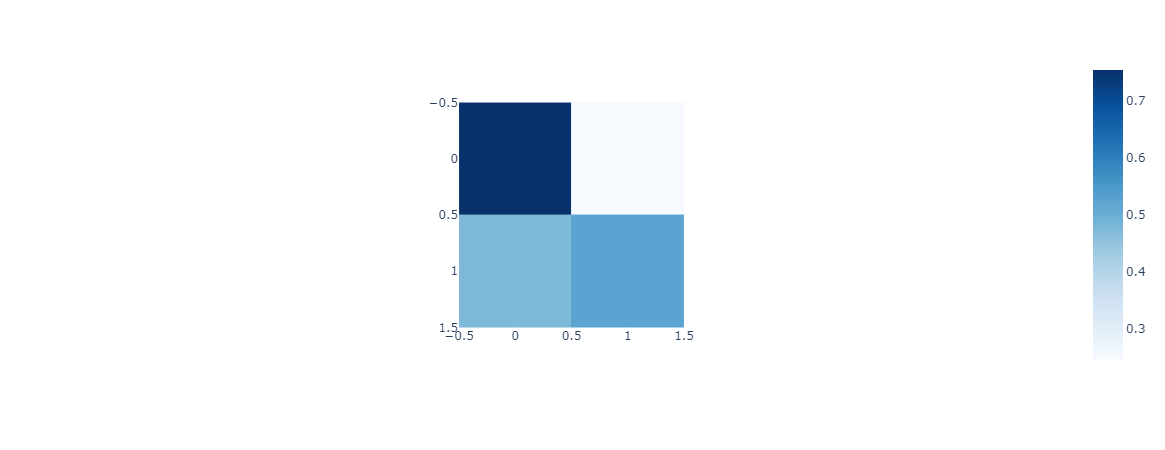

In [21]:
from sklearn.metrics import confusion_matrix
aaa = confusion_matrix(y_test, a)
bbb = aaa/aaa.sum(axis=1)
print(pd.DataFrame(bbb))
fig = px.imshow(bbb, color_continuous_scale='blues')
fig.show()

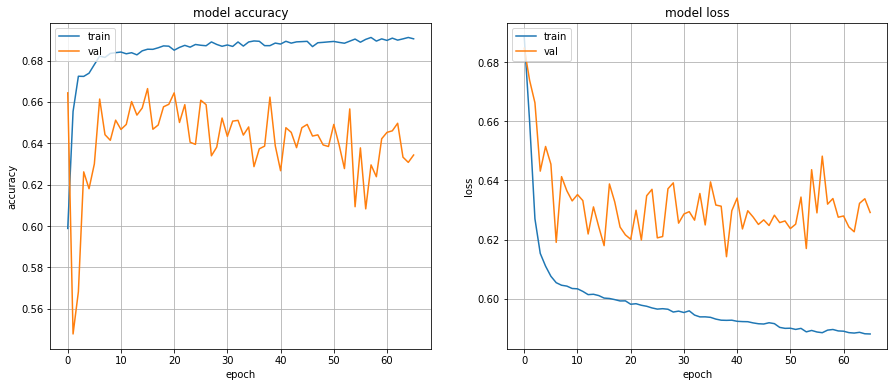

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

AUC: 0.7182915460871355


Text(0.5, 1.0, 'AUC:0.7182915460871355')

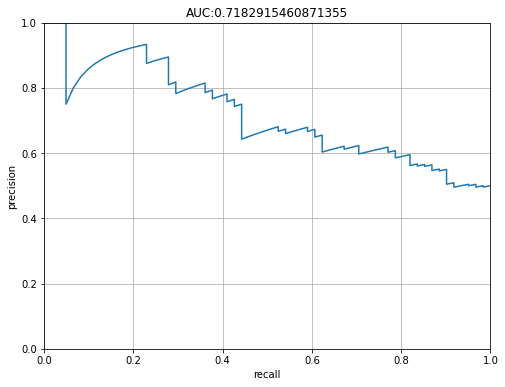

In [27]:
plt.figure(figsize=(8, 6))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_predict, pos_label=1)
plt.plot(recall, precision)
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.ylim([0, 1])
plt.xlim([0, 1])
auc = metrics.average_precision_score(y_test, y_predict)
print('AUC:', auc)
plt.title('AUC:' + str(auc))

In [34]:
y_predict_list = []
y_test_list = []
scores_list = []
precision_list = []
recall_list = []
auc_list = []

for test_indel in tqdm.tqdm(range(length_TF)):
    whole_data_TF = [i for i in range(length_TF)]
    whole_data_TF.pop(test_indel)
    test_TF = [test_indel]
    train_TF = whole_data_TF
    (x_train, y_train, count_set_train) = load_data_TF2(train_TF,data_path)
    (x_test, y_test, count_set) = load_data_TF2(test_TF,data_path)
    if num_classes > 2:
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
    print(y_train.shape, 'y_train samples')
    print(y_test.shape, 'y_test samples')
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    if num_classes <2:
        print ('no enough categories')
        sys.exit()
    elif num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
    else:
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=False, mode='auto')
    checkpoint1 = ModelCheckpoint(filepath=save_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                                  verbose=False, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    checkpoint2 = ModelCheckpoint(filepath=save_dir + '/weights.hdf5', monitor='val_accuracy', verbose=False,
                                  save_best_only=True, mode='auto', period=1)
    callbacks_list = [checkpoint2, early_stopping]
    history = model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,validation_split=0.2,
                          shuffle=True, callbacks=callbacks_list)

    scores = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    y_predict = model.predict(x_test)
    
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_predict, pos_label=1)
    auc = metrics.average_precision_score(y_test, y_predict)
    
    y_predict_list.append(y_predict)
    y_test_list.append(y_test)
    scores_list.append(scores)
    precision_list.append(precision)
    recall_list.append(recall)
    auc_list.append(auc)
    print(f'scores:{scores}\nauc:{auc}')
    

  0%|          | 0/13 [00:00<?, ?it/s]

(53380, 32, 32, 1)
(122, 32, 32, 1)
(53380,) y_train samples
(122,) y_test samples
Epoch 1/300
42/42 [==============================] - 1s 32ms/step - loss: 0.6907 - accuracy: 0.5761 - val_loss: 0.6892 - val_accuracy: 0.6426
Epoch 2/300
42/42 [==============================] - 1s 29ms/step - loss: 0.6756 - accuracy: 0.6539 - val_loss: 0.6702 - val_accuracy: 0.6501
Epoch 3/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6404 - accuracy: 0.6687 - val_loss: 0.6818 - val_accuracy: 0.5253
Epoch 4/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6204 - accuracy: 0.6721 - val_loss: 0.6782 - val_accuracy: 0.5551
Epoch 5/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6129 - accuracy: 0.6767 - val_loss: 0.6596 - val_accuracy: 0.6077
Epoch 6/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6096 - accuracy: 0.6794 - val_loss: 0.6486 - val_accuracy: 0.6276
Epoch 7/300
42/42 [==============================] - 1s 28ms/step

  8%|▊         | 1/13 [01:23<16:36, 83.04s/it]

scores:[0.6869572997093201, 0.631147563457489]
auc:0.7251927610227211
(40070, 32, 32, 1)
(13432, 32, 32, 1)
(40070,) y_train samples
(13432,) y_test samples
Epoch 1/300
32/32 [==============================] - 1s 33ms/step - loss: 0.6904 - accuracy: 0.5742 - val_loss: 0.6882 - val_accuracy: 0.6781
Epoch 2/300
32/32 [==============================] - 1s 28ms/step - loss: 0.6809 - accuracy: 0.6325 - val_loss: 0.6759 - val_accuracy: 0.6623
Epoch 3/300
32/32 [==============================] - 1s 27ms/step - loss: 0.6596 - accuracy: 0.6447 - val_loss: 0.6582 - val_accuracy: 0.6408
Epoch 4/300
32/32 [==============================] - 1s 28ms/step - loss: 0.6436 - accuracy: 0.6507 - val_loss: 0.6614 - val_accuracy: 0.5865
Epoch 5/300
32/32 [==============================] - 1s 28ms/step - loss: 0.6347 - accuracy: 0.6552 - val_loss: 0.6629 - val_accuracy: 0.5765
Epoch 6/300
32/32 [==============================] - 1s 28ms/step - loss: 0.6304 - accuracy: 0.6534 - val_loss: 0.6537 - val_accuracy

 15%|█▌        | 2/13 [02:14<11:47, 64.31s/it]

scores:[0.5818634629249573, 0.7160512208938599]
auc:0.7400267271946839
(52436, 32, 32, 1)
(1066, 32, 32, 1)
(52436,) y_train samples
(1066,) y_test samples
Epoch 1/300
41/41 [==============================] - 1s 32ms/step - loss: 0.6885 - accuracy: 0.6165 - val_loss: 0.6862 - val_accuracy: 0.6659
Epoch 2/300
41/41 [==============================] - 1s 27ms/step - loss: 0.6661 - accuracy: 0.6481 - val_loss: 0.6691 - val_accuracy: 0.6017
Epoch 3/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6330 - accuracy: 0.6681 - val_loss: 0.6628 - val_accuracy: 0.5783
Epoch 4/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6185 - accuracy: 0.6716 - val_loss: 0.6626 - val_accuracy: 0.5810
Epoch 5/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6126 - accuracy: 0.6759 - val_loss: 0.6533 - val_accuracy: 0.6162
Epoch 6/300
41/41 [==============================] - 1s 27ms/step - loss: 0.6090 - accuracy: 0.6778 - val_loss: 0.6438 - val_accuracy:

 23%|██▎       | 3/13 [05:35<21:07, 126.73s/it]

scores:[0.6214106678962708, 0.6763602495193481]
auc:0.6920999885606776
(43402, 32, 32, 1)
(10100, 32, 32, 1)
(43402,) y_train samples
(10100,) y_test samples
Epoch 1/300
34/34 [==============================] - 1s 33ms/step - loss: 0.6921 - accuracy: 0.5731 - val_loss: 0.6905 - val_accuracy: 0.6795
Epoch 2/300
34/34 [==============================] - 1s 28ms/step - loss: 0.6865 - accuracy: 0.6466 - val_loss: 0.6833 - val_accuracy: 0.6636
Epoch 3/300
34/34 [==============================] - 1s 28ms/step - loss: 0.6695 - accuracy: 0.6545 - val_loss: 0.6637 - val_accuracy: 0.6507
Epoch 4/300
34/34 [==============================] - 1s 28ms/step - loss: 0.6404 - accuracy: 0.6639 - val_loss: 0.6595 - val_accuracy: 0.6029
Epoch 5/300
34/34 [==============================] - 1s 28ms/step - loss: 0.6251 - accuracy: 0.6657 - val_loss: 0.6361 - val_accuracy: 0.6426
Epoch 6/300
34/34 [==============================] - 1s 28ms/step - loss: 0.6181 - accuracy: 0.6677 - val_loss: 0.6339 - val_accurac

 31%|███       | 4/13 [06:29<14:42, 98.06s/it] 

scores:[0.573884904384613, 0.7081187963485718]
auc:0.7363962462161959
(53438, 32, 32, 1)
(64, 32, 32, 1)
(53438,) y_train samples
(64,) y_test samples
Epoch 1/300
42/42 [==============================] - 3s 71ms/step - loss: 0.6899 - accuracy: 0.5727 - val_loss: 0.6879 - val_accuracy: 0.6504
Epoch 2/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6714 - accuracy: 0.6509 - val_loss: 0.6693 - val_accuracy: 0.6316
Epoch 3/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6391 - accuracy: 0.6654 - val_loss: 0.6682 - val_accuracy: 0.5648
Epoch 4/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6228 - accuracy: 0.6723 - val_loss: 0.6588 - val_accuracy: 0.5904
Epoch 5/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6154 - accuracy: 0.6736 - val_loss: 0.6564 - val_accuracy: 0.5969
Epoch 6/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6115 - accuracy: 0.6769 - val_loss: 0.6469 - val_accuracy: 0.62

 38%|███▊      | 5/13 [08:58<15:32, 116.62s/it]

scores:[0.5086752772331238, 0.78125]
auc:0.7274738868829748
(52630, 32, 32, 1)
(872, 32, 32, 1)
(52630,) y_train samples
(872,) y_test samples
Epoch 1/300
42/42 [==============================] - 1s 32ms/step - loss: 0.6899 - accuracy: 0.6146 - val_loss: 0.6881 - val_accuracy: 0.5923
Epoch 2/300
42/42 [==============================] - 1s 29ms/step - loss: 0.6731 - accuracy: 0.6614 - val_loss: 0.6652 - val_accuracy: 0.6454
Epoch 3/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6352 - accuracy: 0.6670 - val_loss: 0.6593 - val_accuracy: 0.6002
Epoch 4/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6146 - accuracy: 0.6736 - val_loss: 0.6425 - val_accuracy: 0.6343
Epoch 5/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6100 - accuracy: 0.6771 - val_loss: 0.6475 - val_accuracy: 0.6348
Epoch 6/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6069 - accuracy: 0.6808 - val_loss: 0.6402 - val_accuracy: 0.6453
Epoch

 46%|████▌     | 6/13 [10:26<12:26, 106.64s/it]

scores:[0.6441874504089355, 0.6284403800964355]
auc:0.6726653573497227
(51954, 32, 32, 1)
(1548, 32, 32, 1)
(51954,) y_train samples
(1548,) y_test samples
Epoch 1/300
41/41 [==============================] - 2s 54ms/step - loss: 0.6909 - accuracy: 0.5668 - val_loss: 0.6892 - val_accuracy: 0.5653
Epoch 2/300
41/41 [==============================] - 1s 30ms/step - loss: 0.6782 - accuracy: 0.6591 - val_loss: 0.6733 - val_accuracy: 0.6453
Epoch 3/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6435 - accuracy: 0.6652 - val_loss: 0.6652 - val_accuracy: 0.5790
Epoch 4/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6205 - accuracy: 0.6737 - val_loss: 0.6630 - val_accuracy: 0.5878
Epoch 5/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6110 - accuracy: 0.6768 - val_loss: 0.6340 - val_accuracy: 0.6405
Epoch 6/300
41/41 [==============================] - 1s 28ms/step - loss: 0.6085 - accuracy: 0.6798 - val_loss: 0.6638 - val_accuracy:

 54%|█████▍    | 7/13 [11:46<09:48, 98.04s/it] 

scores:[0.6294394731521606, 0.6459948420524597]
auc:0.6652278390482247
(49634, 32, 32, 1)
(3868, 32, 32, 1)
(49634,) y_train samples
(3868,) y_test samples
Epoch 1/300
39/39 [==============================] - 1s 32ms/step - loss: 0.6868 - accuracy: 0.5982 - val_loss: 0.6841 - val_accuracy: 0.6611
Epoch 2/300
39/39 [==============================] - 1s 28ms/step - loss: 0.6601 - accuracy: 0.6536 - val_loss: 0.6723 - val_accuracy: 0.5655
Epoch 3/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6307 - accuracy: 0.6687 - val_loss: 0.6648 - val_accuracy: 0.5727
Epoch 4/300
39/39 [==============================] - 1s 28ms/step - loss: 0.6174 - accuracy: 0.6733 - val_loss: 0.6714 - val_accuracy: 0.5632
Epoch 5/300
39/39 [==============================] - 1s 28ms/step - loss: 0.6112 - accuracy: 0.6764 - val_loss: 0.6632 - val_accuracy: 0.5966
Epoch 6/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6074 - accuracy: 0.6816 - val_loss: 0.6486 - val_accuracy:

 62%|██████▏   | 8/13 [13:12<07:51, 94.30s/it]

scores:[0.6250101327896118, 0.6561530232429504]
auc:0.6767796667149177
(48644, 32, 32, 1)
(4858, 32, 32, 1)
(48644,) y_train samples
(4858,) y_test samples
Epoch 1/300
39/39 [==============================] - 1s 31ms/step - loss: 0.6915 - accuracy: 0.5936 - val_loss: 0.6903 - val_accuracy: 0.5232
Epoch 2/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6826 - accuracy: 0.6547 - val_loss: 0.6831 - val_accuracy: 0.5130
Epoch 3/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6557 - accuracy: 0.6687 - val_loss: 0.7184 - val_accuracy: 0.5001
Epoch 4/300
39/39 [==============================] - 1s 29ms/step - loss: 0.6277 - accuracy: 0.6665 - val_loss: 0.6168 - val_accuracy: 0.6800
Epoch 5/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6165 - accuracy: 0.6765 - val_loss: 0.6507 - val_accuracy: 0.6284
Epoch 6/300
39/39 [==============================] - 1s 27ms/step - loss: 0.6048 - accuracy: 0.6831 - val_loss: 0.6387 - val_accuracy:

 69%|██████▉   | 9/13 [14:24<05:49, 87.37s/it]

scores:[0.6497008800506592, 0.6296830177307129]
auc:0.6530900380849463
(51340, 32, 32, 1)
(2162, 32, 32, 1)
(51340,) y_train samples
(2162,) y_test samples
Epoch 1/300
41/41 [==============================] - 1s 32ms/step - loss: 0.6916 - accuracy: 0.5877 - val_loss: 0.6897 - val_accuracy: 0.5113
Epoch 2/300
41/41 [==============================] - 1s 29ms/step - loss: 0.6801 - accuracy: 0.6632 - val_loss: 0.6750 - val_accuracy: 0.6250
Epoch 3/300
41/41 [==============================] - 1s 27ms/step - loss: 0.6446 - accuracy: 0.6661 - val_loss: 0.6851 - val_accuracy: 0.5189
Epoch 4/300
41/41 [==============================] - 1s 29ms/step - loss: 0.6170 - accuracy: 0.6727 - val_loss: 0.6175 - val_accuracy: 0.6660
Epoch 5/300
41/41 [==============================] - 1s 27ms/step - loss: 0.6106 - accuracy: 0.6782 - val_loss: 0.6440 - val_accuracy: 0.6382
Epoch 6/300
41/41 [==============================] - 1s 29ms/step - loss: 0.6077 - accuracy: 0.6805 - val_loss: 0.6100 - val_accuracy:

 77%|███████▋  | 10/13 [17:05<05:30, 110.02s/it]

scores:[0.5889405608177185, 0.6720629334449768]
auc:0.7624266999331933
(53296, 32, 32, 1)
(206, 32, 32, 1)
(53296,) y_train samples
(206,) y_test samples
Epoch 1/300
42/42 [==============================] - 1s 32ms/step - loss: 0.6893 - accuracy: 0.6099 - val_loss: 0.6856 - val_accuracy: 0.6387
Epoch 2/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6644 - accuracy: 0.6589 - val_loss: 0.6629 - val_accuracy: 0.6152
Epoch 3/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6271 - accuracy: 0.6707 - val_loss: 0.6480 - val_accuracy: 0.6214
Epoch 4/300
42/42 [==============================] - 1s 27ms/step - loss: 0.6143 - accuracy: 0.6743 - val_loss: 0.6429 - val_accuracy: 0.6351
Epoch 5/300
42/42 [==============================] - 1s 28ms/step - loss: 0.6103 - accuracy: 0.6772 - val_loss: 0.6441 - val_accuracy: 0.6359
Epoch 6/300
42/42 [==============================] - 1s 29ms/step - loss: 0.6082 - accuracy: 0.6790 - val_loss: 0.6266 - val_accuracy: 0

 85%|████████▍ | 11/13 [18:37<03:29, 104.58s/it]

scores:[0.6195011138916016, 0.6504854559898376]
auc:0.7047118283078561
(46322, 32, 32, 1)
(7180, 32, 32, 1)
(46322,) y_train samples
(7180,) y_test samples
Epoch 1/300
37/37 [==============================] - 1s 33ms/step - loss: 0.6905 - accuracy: 0.5917 - val_loss: 0.6886 - val_accuracy: 0.6367
Epoch 2/300
37/37 [==============================] - 1s 28ms/step - loss: 0.6749 - accuracy: 0.6508 - val_loss: 0.6713 - val_accuracy: 0.6242
Epoch 3/300
37/37 [==============================] - 1s 28ms/step - loss: 0.6381 - accuracy: 0.6702 - val_loss: 0.6862 - val_accuracy: 0.5235
Epoch 4/300
37/37 [==============================] - 1s 28ms/step - loss: 0.6180 - accuracy: 0.6754 - val_loss: 0.7064 - val_accuracy: 0.5217
Epoch 5/300
37/37 [==============================] - 1s 28ms/step - loss: 0.6114 - accuracy: 0.6764 - val_loss: 0.6740 - val_accuracy: 0.5676
Epoch 6/300
37/37 [==============================] - 1s 27ms/step - loss: 0.6081 - accuracy: 0.6799 - val_loss: 0.6574 - val_accuracy:

 92%|█████████▏| 12/13 [21:59<02:14, 134.20s/it]

scores:[0.6233527064323425, 0.6469359397888184]
auc:0.6379574562068648
(45478, 32, 32, 1)
(8024, 32, 32, 1)
(45478,) y_train samples
(8024,) y_test samples
Epoch 1/300
36/36 [==============================] - 1s 34ms/step - loss: 0.6899 - accuracy: 0.6114 - val_loss: 0.6873 - val_accuracy: 0.6634
Epoch 2/300
36/36 [==============================] - 1s 28ms/step - loss: 0.6721 - accuracy: 0.6505 - val_loss: 0.6659 - val_accuracy: 0.6438
Epoch 3/300
36/36 [==============================] - 1s 28ms/step - loss: 0.6369 - accuracy: 0.6735 - val_loss: 0.6646 - val_accuracy: 0.5785
Epoch 4/300
36/36 [==============================] - 1s 28ms/step - loss: 0.6168 - accuracy: 0.6798 - val_loss: 0.6522 - val_accuracy: 0.5964
Epoch 5/300
36/36 [==============================] - 1s 28ms/step - loss: 0.6091 - accuracy: 0.6817 - val_loss: 0.6468 - val_accuracy: 0.6069
Epoch 6/300
36/36 [==============================] - 1s 29ms/step - loss: 0.6067 - accuracy: 0.6827 - val_loss: 0.6448 - val_accuracy:

100%|██████████| 13/13 [22:56<00:00, 105.90s/it]

scores:[0.6289962530136108, 0.631729781627655]
auc:0.7177806009561676


In [37]:
np.mean(auc_list)

0.7009099304983959

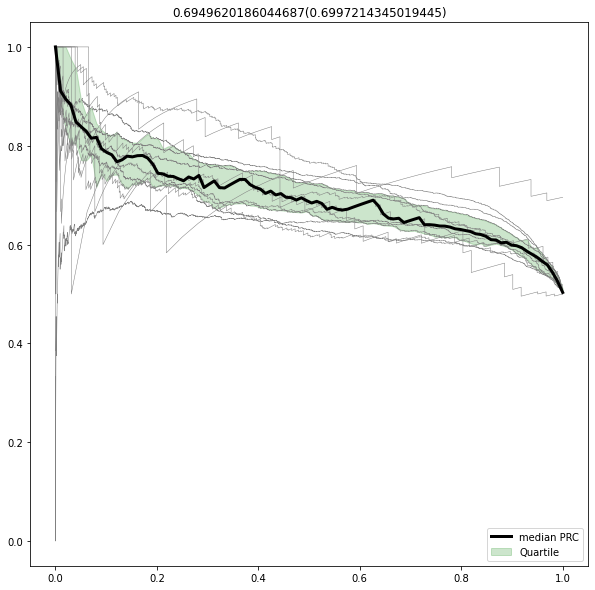

In [80]:
fig = plt.figure(figsize=(10, 10))
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i in range(len(auc_list)):
    scores, precision, recall, auc = scores_list[i], precision_list[i], recall_list[i], auc_list[i]
    index = recall.argsort()
    tprs.append(np.interp(mean_fpr, recall[index], precision[index]))
    tprs[-1][0] = 1.0
    plt.plot(recall, precision, color='0.5', lw=0.5)

    
median_tpr = np.median(tprs, axis=0)
mean_tpr = np.mean(tprs, axis=0)

per_tpr = np.percentile(tprs, [25, 50, 75], axis=0)
median_auc = np.trapz(median_tpr, mean_fpr)
mean_auc = np.trapz(mean_tpr, mean_fpr)
plt.plot(mean_fpr, median_tpr, 'k', lw=3, label='median PRC')
plt.title(f'{str(median_auc)}({str(mean_auc)})')
plt.fill_between(mean_fpr, per_tpr[0, :], per_tpr[2, :], color='g', alpha=.2, label='Quartile')
plt.legend(loc='lower right')